# Einlesen der FACT Daten


Die Daten sind im HDF5 Format gespeichert und können mit dem Python-Modul h5py eingelesen werden.

Das Python-Modul `pyfact` bietet eine nützliche Funktion, um diese Daten direkt in ein `pandas.DataFrame` einzulesen.

```
$ pip install pyfact
```

In [117]:
from fact.io import read_h5py
import h5py
import matplotlib.pyplot as plt
import numpy as np

%matplotlib inline

# Einlesen mit h5py

In [118]:
f = h5py.File('open_crab_sample_dl3.hdf5')

print('Tables:')
print(*f)

print()
print('Columns in events table')
print(*f['events'])

print()
print('Columns in runs table')
print(*f['runs'])
f.close()

Tables:
events runs

Columns in events table
dec_prediction disp_prediction event_num gamma_energy_prediction gamma_prediction index night pointing_position_az pointing_position_zd ra_prediction run_id theta_deg theta_deg_off_1 theta_deg_off_2 theta_deg_off_3 theta_deg_off_4 theta_deg_off_5 timestamp

Columns in runs table
azimuth declination index night ontime right_ascension run_id run_start run_stop source zenith


In [164]:
#theta_deg = f['events/theta_deg'][:]

#plt.hist(theta_deg**2, bins=30, range=[0, 0.1])
#None

## Daten einlesen mit pyfact

In [119]:
gammas = read_h5py('gamma_test_dl3.hdf5', key='events', columns=[
    'gamma_energy_prediction',
    'gamma_prediction',
    'theta_deg',
    'corsika_event_header_event_number',
    'corsika_event_header_total_energy',
])
#Testdatensatz aus simulierten Daten


gammas_corsika = read_h5py(
    'gamma_corsika_events_1.1.2.hdf5',
    key='corsika_events',
    columns=['total_energy'],
)
# Infos über simulierten Daten


crab_events = read_h5py('open_crab_sample_dl3.hdf5', key='events', columns=[
    'gamma_prediction',
    'gamma_energy_prediction',
    'theta_deg',
    'theta_deg_off_1',
    'theta_deg_off_2',
    'theta_deg_off_3',
    'theta_deg_off_4',
    'theta_deg_off_5',
])
#Messdaten

crab_runs = read_h5py('open_crab_sample_dl3.hdf5', key='runs')

In [120]:
gammas.head()

,gamma_energy_prediction,gamma_prediction,theta_deg,corsika_event_header_event_number,corsika_event_header_total_energy
0,638.000843,0.447124,1.488068,2573,712.86725
1,815.277399,0.821376,0.017161,1467,885.03720
2,838.617856,0.753859,0.256387,1149,928.05080
3,680.715070,0.780553,0.127763,1117,420.21652
4,1896.676302,0.884016,0.079996,818,2458.86300


In [167]:
#plt.hist(crab_events.gamma_prediction, bins=100)
#None

In [165]:
#crab_events[crab_events.gamma_prediction>0.8].head()

In [123]:
gammas_corsika.head()

,total_energy
0,555.437866
1,219.566406
2,251.086472
3,241.302872
4,438.971619


In [124]:
#gammas_corsika.size

18000000

In [166]:
crab_events.head()

,gamma_prediction,gamma_energy_prediction,theta_deg,theta_deg_off_1,theta_deg_off_2,theta_deg_off_3,theta_deg_off_4,theta_deg_off_5
0,0.053490,900.409597,2.998553,3.334691,3.161481,2.596387,2.147755,2.395359
1,0.763826,3066.336771,1.249202,0.646134,0.606390,1.208694,1.613697,1.629050
2,0.016127,885.460576,1.875420,2.267059,2.206321,1.724483,1.162611,1.274096
3,0.640739,574.241283,1.031180,0.432483,0.457356,1.052426,1.408521,1.400642
4,0.061178,1349.901793,2.703792,2.592317,3.109998,3.635254,3.715596,3.294397


# Limits für theata^2 - Plot

In [154]:
limit_theta = np.sqrt(0.3)
crab_events_pred = crab_events[crab_events.gamma_prediction>0.8]
crab_events_sel= crab_events_pred[crab_events_pred.theta_deg<limit_theta]

gammas_pred = gammas[gammas.gamma_prediction>0.8]
gammas_sel = gammas_pred[gammas_pred.theta_deg < limit_theta]
len(crab_events_sel)

4196

In [155]:
crab_events_sel_1 = crab_events_pred[crab_events_pred.theta_deg_off_1 < limit_theta]
crab_events_sel_2 = crab_events_pred[crab_events_pred.theta_deg_off_2 < limit_theta]
crab_events_sel_3 = crab_events_pred[crab_events_pred.theta_deg_off_3 < limit_theta]
crab_events_sel_4 = crab_events_pred[crab_events_pred.theta_deg_off_4 < limit_theta]
crab_events_sel_5 = crab_events_pred[crab_events_pred.theta_deg_off_5 < limit_theta]
#print(len(crab_events_sel_1)+len(crab_events_sel_2)+len(crab_events_sel_3)+len(crab_events_sel_4)+len(crab_events_sel_5))
len(crab_events_sel_1)

3528

# Histogramm der Abstandswinkel

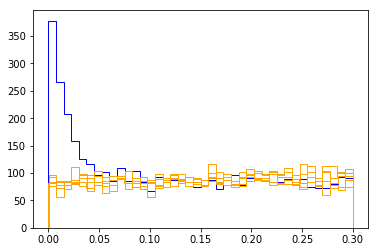

In [168]:
crab_events_sel_on = np.array(crab_events_sel.theta_deg.values)
plt.hist((crab_events_sel_on)**2, bins =40, histtype='step', color='blue')
None

#crab_events_sel_off_1 = np.array(crab_events_sel_1.theta_deg_off_1.values)
#crab_events_sel_off_2 = np.array(crab_events_sel_1.theta_deg_off_2.values)
#crab_events_sel_off_3 = np.array(crab_events_sel_1.theta_deg_off_3.values)
#crab_events_sel_off_4 = np.array(crab_events_sel_1.theta_deg_off_4.values)
#crab_events_sel_off_5 = np.array(crab_events_sel_1.theta_deg_off_5.values)
#crab_events_sel_off_temp1 = np.append(crab_events_sel_off_1, crab_events_sel_off_2)
#crab_events_sel_off_temp2 = np.append(crab_events_sel_off_temp1, crab_events_sel_off_3)
#crab_events_sel_off_temp3 = np.append(crab_events_sel_off_temp2, crab_events_sel_off_4)
#crab_events_sel_off = np.append(crab_events_sel_off_temp3, crab_events_sel_off_5)

#plt.hist((crab_events_sel_off)**2, bins=40, histtype='step', color='orange')
plt.hist((crab_events_sel_1.theta_deg_off_1.values)**2, bins=40, histtype='step', color='orange')
plt.hist((crab_events_sel_2.theta_deg_off_2.values)**2, bins=40, histtype='step', color='orange')
plt.hist((crab_events_sel_3.theta_deg_off_3.values)**2, bins=40, histtype='step', color='orange')
plt.hist((crab_events_sel_4.theta_deg_off_4.values)**2, bins=40, histtype='step', color='orange')
plt.hist((crab_events_sel_5.theta_deg_off_5.values)**2, bins=40, histtype='step', color='orange')
None


# Limit für Datenauswertung

In [ ]:
limit_theta = np.sqrt(0.025)
crab_events_pred = crab_events[crab_events.gamma_prediction>0.8]
crab_events_sel= crab_events_pred[crab_events_pred.theta_deg<limit_theta]

gammas_pred = gammas[gammas.gamma_prediction>0.8]
gammas_sel = gammas_pred[gammas_pred.theta_deg < limit_theta]

# 2D-Scatterplot der Energien

Text(0, 0.5, 'gamma_true_energy')

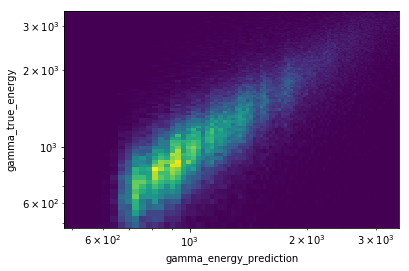

In [133]:
# definiere Grenzquantile für plot
up = np.quantile(gammas['corsika_event_header_total_energy'], 0.9)
low = np.quantile(gammas['corsika_event_header_total_energy'], 0.1)

matrix, xedge, yedge, image = plt.hist2d(gammas_sel['gamma_energy_prediction'],
                                         gammas_sel['corsika_event_header_total_energy'], 
                                         bins=100, 
                                         normed='True',
                                         range=[[low, up],[low, up]])
plt.xscale('log')
plt.yscale('log')
plt.xlabel('gamma_energy_prediction')
plt.ylabel('gamma_true_energy')